### Imports

In [9]:
import time
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from utils import OD_Assemble
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from tensorflow.keras.preprocessing.image import img_to_array,load_img

# optional
# from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline


# Enable GPU dynamic memory allocation (do not use this for colab)
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)


### Loading Models

In [10]:
MODEL_LIST = os.listdir('../annotations/ensemble_outputs/single_model_preds')
MODEL_LIST[2:-1]

['faster_rcnn_resnet101_v1_1024x1024_BBOX.pkl',
 'faster_rcnn_resnet101_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_800x1333_BBOX.pkl',
 'faster_rcnn_resnet50_v1_640x640_BBOX.pkl']

In [3]:
start_time = time.time()
loaded_model_lst = dict()
for mdl in MODEL_LIST[2:-1]:
    mdl_pth = "../exported-models/"+mdl[:-9]+"/saved_model"
    loaded_model_lst[mdl] = tf.saved_model.load(mdl_pth)
    print("loaded model -> ",mdl[:-9])
    # print(mdl_pth)
PATH_TO_LABELS = "../annotations/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)
print('Done! Took {} seconds'.format(time.time() - start_time))

loaded model ->  faster_rcnn_resnet101_v1_1024x1024
loaded model ->  faster_rcnn_resnet101_v1_640x640
loaded model ->  faster_rcnn_resnet152_v1_640x640
loaded model ->  faster_rcnn_resnet152_v1_800x1333
loaded model ->  faster_rcnn_resnet50_v1_640x640
Done! Took 295.88686084747314 seconds


In [14]:
import imp
imp.reload(OD_Assemble)
combine  = OD_Assemble.Combiner(list(loaded_model_lst.values()),category_index,con_thresh=0.1)
image_with_detections = combine.NWfb('test_imgs/014060.jpg',operator=2,visualize=1) #def NWfb(self,image_path,operator=1,visualize=0):
Image.fromarray(image_with_detections, 'RGB')
# plt.imshow(image_with_detections)
# plt.savefig('outputs/realworld/output_'+str(int(time.time()))+'.png', bbox_inches='tight',dpi=400,facecolor=fig.get_facecolor())
# plt.imsave('outputs/realworld/output_'+str(int(time.time()))+'.png', image_with_detections, format="png")

 ::---- Prediction #1, with probability 60.97% for class Shorts ----::
 ::---- Prediction #2, with probability 93.84% for class Tee ----::


In [8]:
import imp
imp.reload(OD_Assemble)
combine  = OD_Assemble.Combiner(list(loaded_model_lst.values()),category_index,con_thresh=0.6)
image_path_list = ['014060.jpg','016166.jpg','020635.jpg','024347.jpg','026201.jpg','028101.jpg','028745.jpg','030648.jpg']
for img_path in tqdm(image_path_list):
    image_with_detections = combine.NWfb('test_imgs/'+img_path,operator=2,visualize=1) #def NWfb(self,image_path,operator=1,visualize=0):
    plt.imsave('outputs/realworld/output_'+img_path+'.png', image_with_detections, format="png")

  0%|          | 0/8 [00:00<?, ?it/s]

 ::---- Prediction #1, with probability 60.97% for class Shorts ----::
 ::---- Prediction #2, with probability 93.84% for class Tee ----::


 25%|██▌       | 2/8 [00:25<01:15, 12.52s/it]

 ::---- Prediction #1, with probability 71.11% for class Shorts ----::
 ::---- Prediction #2, with probability 91.81% for class Blouse ----::
 ::---- Prediction #1, with probability 84.67% for class Tee ----::
 ::---- Prediction #2, with probability 97.40% for class Blouse ----::


 38%|███▊      | 3/8 [00:39<01:06, 13.32s/it]

 ::---- Prediction #1, with probability 94.75% for class Tee ----::


 50%|█████     | 4/8 [00:52<00:52, 13.12s/it]

 ::---- Prediction #1, with probability 63.56% for class Romper ----::
 ::---- Prediction #2, with probability 73.71% for class Skirt ----::


 75%|███████▌  | 6/8 [01:17<00:25, 12.97s/it]

 ::---- Prediction #1, with probability 76.17% for class Blouse ----::
 ::---- Prediction #1, with probability 97.50% for class Dress ----::


 88%|████████▊ | 7/8 [01:30<00:12, 12.94s/it]

 ::---- Prediction #1, with probability 83.52% for class Shorts ----::
 ::---- Prediction #2, with probability 89.28% for class Blouse ----::


100%|██████████| 8/8 [01:44<00:00, 13.02s/it]


In [7]:
os.listdir('test_imgs')

['014060.jpg',
 '016166.jpg',
 '020635.jpg',
 '024347.jpg',
 '026201.jpg',
 '028101.jpg',
 '028745.jpg',
 '030648.jpg',
 'aishvar.jpeg',
 'aishwarya-full-res.jpeg',
 'aishwarya-full.jpeg',
 'aishwarya.jpeg',
 'Captu3re.PNG',
 'Capture.PNG',
 'Capture2.PNG',
 'chomu.jpeg',
 'DSC08400.JPG',
 'family-g74ba56f99_1920.jpg',
 'IMG_20190316_100529.jpg',
 'IMG_20211012_150121__2_-removebg-preview.png',
 'SAHIL CHAVAN.png']

----

## Old code

In [3]:
PATH_TO_SAVED_MODEL_1 = "../exported-models/faster_rcnn_inception_resnet_v2_640x640/saved_model"
PATH_TO_SAVED_MODEL_2 = "../exported-models/faster_rcnn_resnet101_v1_640x640/saved_model"
PATH_TO_SAVED_MODEL_3 = "../exported-models/faster_rcnn_resnet152_v1_640x640/saved_model"
PATH_TO_SAVED_MODEL_4 = "../exported-models/faster_rcnn_resnet152_v1_800x1333/saved_model"
PATH_TO_LABELS = "../annotations/label_map.pbtxt"


print('Loading Model...')
start_time = time.time()
loaded_model_1 = tf.saved_model.load(PATH_TO_SAVED_MODEL_1)
print('Model 1 loaded')
loaded_model_2 = tf.saved_model.load(PATH_TO_SAVED_MODEL_2)
print('Model 2 loaded')
loaded_model_3 = tf.saved_model.load(PATH_TO_SAVED_MODEL_3)
print('Model 3 loaded')
loaded_model_4 = tf.saved_model.load(PATH_TO_SAVED_MODEL_4)
print('Model 4 loaded')

print('Models loaded, loadning labels...')
# Loading the pbtxt
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

print('Done! Took {} seconds'.format(time.time() - start_time))

Loading Model...
Model 1 loaded
Model 2 loaded
Model 3 loaded
Model 4 loaded
Models loaded, loadning labels...
Done! Took 61.333361864089966 seconds


### Getting CSV data

In [4]:
df = pd.read_csv('../annotations/csvs/uncropped_res_capped_balanced/test.csv')
train_df = pd.read_csv('../annotations/csvs/uncropped_res_capped_balanced/train.csv')
data = pd.read_csv('../annotations/csvs/no_bads_atall_annos.csv')

### Helper Functions

In [5]:
def show_inference(model,frame):
      test_image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      test_image_array_ex = np.expand_dims(test_image_rgb, axis=0)

      test_image_tensor = tf.convert_to_tensor(test_image_array_ex)
      test_image_tensor = tf.cast(test_image_tensor, tf.uint8) #changinig the dtype according to serving_default.

      with tf.device('/cpu:0'):
            prediction = model(test_image_tensor)
        
      num_bboxes = int(prediction.pop('num_detections'))
      prediction = {key: value[0, :num_bboxes].numpy() for key, value in prediction.items()}
      prediction['num_detections'] = num_bboxes
          
      prediction['detection_classes'] = prediction['detection_classes'].astype(np.int64)

      image_with_detections = test_image_rgb.copy()
      viz_utils.visualize_boxes_and_labels_on_image_array(
            image_with_detections,
            prediction['detection_boxes'],
            prediction['detection_classes'],
            prediction['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.5,
            agnostic_mode=False)
      return image_with_detections

### Ensembling

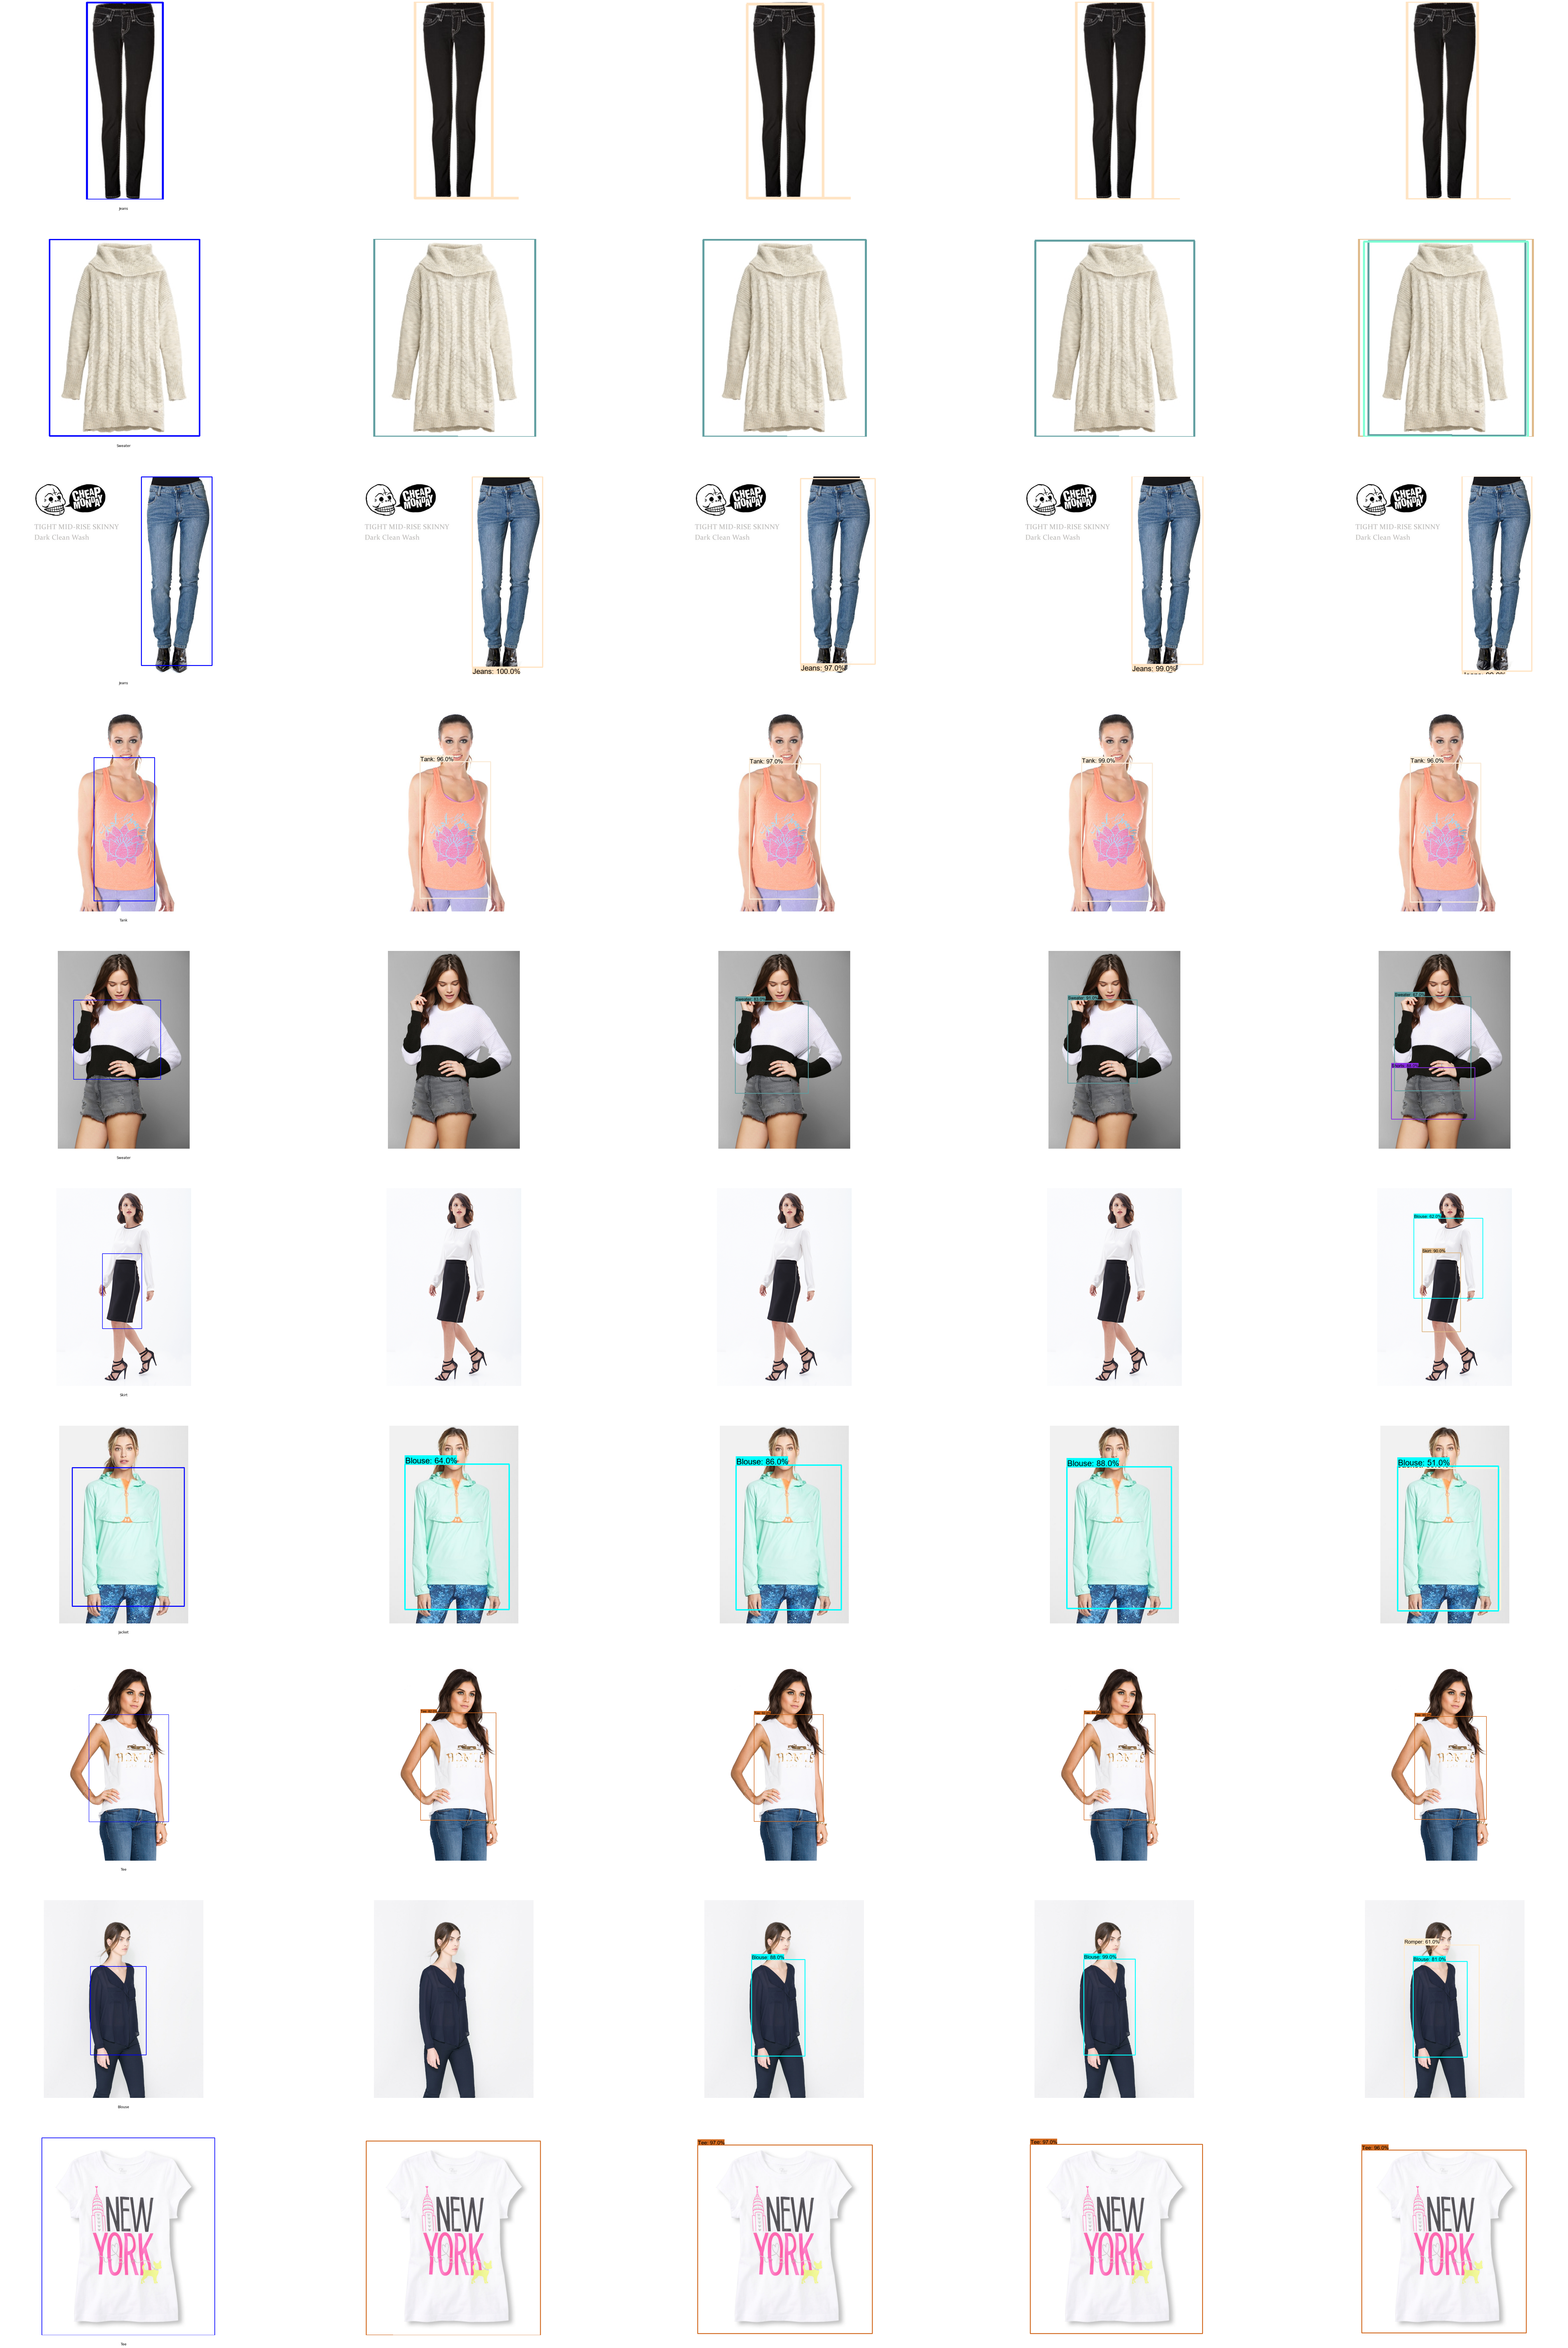

In [12]:
import imp
imp.reload(OD_Assemble)

combine  = OD_Assemble.Combiner([loaded_model_1,loaded_model_2,loaded_model_3],category_index,con_thresh=0.5)
# image_with_detections = combine.Wfb('images/000061.jpg')
# Image.fromarray(image_with_detections, 'RGB')



plt.figure(figsize=(100,150))
samples = 10
# for i,d in df[df['class']==cls_lst[2]].sample(samples).reset_index().iterrows():
for i,d in df.sample(samples).reset_index().iterrows():
    
    test_image_o = cv2.imread('../'+d['filename'])
    inference1 = show_inference(loaded_model_1,test_image_o)
    inference2 = show_inference(loaded_model_2,test_image_o)
    inference3 = show_inference(loaded_model_3,test_image_o)
    inference4 = show_inference(loaded_model_4,test_image_o)
    
    # image_with_detections = combine.NWfb('../'+d['filename'],2,1)
    
    x1,y1,x2,y2 = d[['xmin','ymin','xmax','ymax']].values
    grndimg = cv2.rectangle(test_image_o,(x1,y1),(x2,y2),(255, 0, 0), 2)
   
    p = plt.subplot(samples,5,i*5+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(grndimg, cv2.COLOR_BGR2RGB))
    plt.text(0.5,-0.05, d['class'], size=12, ha="center",transform=p.transAxes)
    
    plt.subplot(samples,5,i*5+2)
    plt.axis('off')
    plt.imshow(inference1)
    
    plt.subplot(samples,5,i*5+3)
    plt.axis('off')
    plt.imshow(inference2)
    
    plt.subplot(samples,5,i*5+4)
    plt.axis('off')
    plt.imshow(inference3)
    
# Uncomment if you want 4th model prediction
    plt.subplot(samples,5,i*5+5)
    plt.axis('off')
    plt.imshow(inference4)
    
# Uncomment if you want wbf model prediction    
    # plt.subplot(samples,5,i*5+5)
    # plt.axis('off')
    # plt.imshow(image_with_detections)
    
plt.savefig('outputs/output_'+str(int(time.time()))+'_1333.png', bbox_inches='tight')
plt.show()

### Getting Mass Predictions

In [73]:
import imp
imp.reload(OD_Assemble)
combine  = OD_Assemble.Combiner([loaded_model_1,loaded_model_2,loaded_model_3],category_index,con_thresh=0.5)
# %load_ext line_profiler
def calculations():
    nm,aa,ab,ac,status = list(),list(),list(),list(),list( )
    # for i in tqdm(range(df.shape[0])):
    for i in tqdm(range(10)):
        d = df.iloc[i]
        a,b,c = combine.NWfb('../'+d['filename'],2)
        if c:nm.extend([d['filename'] for _ in range(len(c))]),aa.extend(a),ab.extend(b),ac.extend(c),status.extend([1 for _ in range(len(c))])
        else:nm.append(d['filename']),aa.extend([[0]*4]),ab.append(0),ac.append(0),status.append(0)
    return nm,aa,ab,ac,status

In [74]:
%lprun -f combine.NWfb calculations()

100%|██████████| 10/10 [00:37<00:00,  3.75s/it]


Timer unit: 1e-07 s

Total time: 37.4262 s
File: p:\PythOn\Projects\COD\Deep\code_files\utils\OD_Assemble.py
Function: NWfb at line 85

Line #      Hits         Time  Per Hit   % Time  Line Contents
    85                                               def NWfb(self,image_path,operator=1,visualize=0):
    86                                           
    87        10    2042875.0 204287.5      0.5          test_image_o = cv2.imread(image_path)
    88        10     110940.0  11094.0      0.0          test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
    89        10       4995.0    499.5      0.0          test_image_array_ex = np.expand_dims(test_image_rgb, axis=0)
    90        10      13147.0   1314.7      0.0          test_image_tensor = tf.convert_to_tensor(test_image_array_ex)
    91        10       4581.0    458.1      0.0          test_image_tensor = tf.cast(test_image_tensor, tf.uint8)
    92                                                   
    93        10        

In [51]:
npaa = np.array(aa)
predicted_data = pd.DataFrame({
    'filename':nm,
    'class':ac,
    'score':ab,
    'x1':npaa[:,0],
    'y1':npaa[:,1],
    'x2':npaa[:,2],
    'y2':npaa[:,3],
    'status':status
})
predicted_data

filename  class     score  \
0   img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg    5.0  0.941986   
1            img/Button-Front_Blazer/img_00000093.jpg    1.0  0.931356   
2     img/Open-Front_Zippered_Blazer/img_00000068.jpg    5.0  0.812228   
3   img/Faux_Snakeskin-Trimmed_Blazer/img_00000051...    5.0  0.859211   
4   img/Classic_Single-Button_Blazer/img_00000001.jpg    1.0  0.846900   
5              img/Two-Button_Blazer/img_00000143.jpg    1.0  0.908007   
6              img/Two-Button_Blazer/img_00000157.jpg    1.0  0.944713   
7              img/Two-Button_Blazer/img_00000147.jpg    1.0  0.879966   
8          img/Textured_Woven_Blazer/img_00000072.jpg    5.0  0.873542   
9           img/Draped_Collar_Blazer/img_00000014.jpg    3.0  0.830426   
10  img/Collarless_Draped-Front_Blazer/img_0000009...    1.0  0.577504   
11  img/Collarless_Draped-Front_Blazer/img_0000009...    5.0  0.748021   
12    img/Open-Front_Zippered_Blazer/img_00000073.jpg    1.0  0.792083   
13    img/Open-Front_Zippered_Blazer/img_00000073.jpg    3.0  0.593658   
14  img/Faux_Snakeskin-Trimmed_Blazer/img_00000104...    5.0  0.928539   
15  img/Asymmetrical_Open-Front_Blazer/img_0000001...    5.0  0.577933   
16          img/Single-Button_Blazer/img_00000014.jpg    1.0  0.919275   
17         img/Tailored_Woven_Blazer/img_00000099.jpg    1.0  0.894311   
18  img/Watercolor_Floral_Print_Blazer/img_0000000...    5.0  0.935719   
19         img/Tailored_Woven_Blazer/img_00000027.jpg    1.0  0.884007   
20            img/Tulip_Front_Blazer/img_00000097.jpg    1.0  0.763411   
21     img/Quilted_Open-Front_Blazer/img_00000098.jpg    5.0  0.763064   
22         img/Textured_Woven_Blazer/img_00000080.jpg    1.0  0.864072   
23         img/Textured_Woven_Blazer/img_00000080.jpg    3.0  0.580446   
24         img/Tailored_Woven_Blazer/img_00000060.jpg    1.0  0.815377   
25         img/Classic_Cuffed_Blazer/img_00000033.jpg    0.0  0.000000   
26            img/Cuffed_Knit_Blazer/img_00000071.jpg    1.0  0.689305   
27            img/Cuffed_Knit_Blazer/img_00000071.jpg    3.0  0.874831   
28  img/Classic_Single-Button_Blazer/img_00000112.jpg    1.0  0.832291   
29         img/Dropped-Collar_Blazer/img_00000034.jpg    2.0  0.926518   
30     img/Tulip-Back_Chiffon_Blazer/img_00000020.jpg   11.0  0.954150   
31  img/Collarless_Faux_Leather-Sleeve_Blazer/img_...    5.0  0.759505   
32  img/Asymmetrical_Open-Front_Blazer/img_0000005...    5.0  0.971922   
33  img/Asymmetrical_Open-Front_Blazer/img_0000005...   10.0  0.525338   
34     img/Classic_Open-Front_Blazer/img_00000047.jpg    1.0  0.849487   
35       img/Open-Front_Linen_Blazer/img_00000101.jpg    1.0  0.612809   
36       img/Open-Front_Linen_Blazer/img_00000101.jpg    3.0  0.502786   
37       img/Open-Front_Linen_Blazer/img_00000101.jpg    5.0  0.507059   

          x1        y1        x2        y2  status  
0   0.270818  0.235579  0.869606  0.787475       1  
1   0.249350  0.235656  0.854707  0.761541       1  
2   0.282402  0.285886  0.903172  0.761842       1  
3   0.287549  0.230270  0.810883  0.774459       1  
4   0.152632  0.381819  0.500154  0.653065       1  
5   0.265384  0.151330  0.952018  0.812817       1  
6   0.246462  0.150807  0.989923  0.732175       1  
7   0.251147  0.137308  1.000000  0.724671       1  
8   0.180811  0.214219  0.708226  0.792875       1  
9   0.230523  0.036556  0.787368  0.921488       1  
10  0.252591  0.155347  0.915568  0.758179       1  
11  0.232284  0.160529  0.920325  0.765452       1  
12  0.260605  0.145775  0.992632  0.832718       1  
13  0.252805  0.163443  0.994412  0.825293       1  
14  0.256096  0.217430  0.990088  0.768605       1  
15  0.129050  0.257562  0.539584  0.672246       1  
16  0.058775  0.305713  0.471103  0.723932       1  
17  0.210443  0.184822  1.000000  0.853848       1  
18  0.221903  0.091422  0.966567  0.878890       1  
19  0.246975  0.143331  0.867736  0.871601       1  
20  0.235342  0.042186  0.767653  0.723282   

In [41]:
len(nm),len(aa),len(ab),len(ac),len(status)

(40, 42, 42, 42, 40)

In [10]:
import multiprocessing
global get_prediction

global predictions
def get_prediction(loaded_model,test_image_tensor):
    global predictions
    predictions =  loaded_model(test_image_tensor)

if __name__ == '__main__':

    image_path = '../' +df.iloc[10]['filename']
    test_image_o = cv2.imread(image_path)
    test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
    test_image_array_ex = np.expand_dims(test_image_rgb, axis=0)
    test_image_tensor = tf.convert_to_tensor(test_image_array_ex)
    test_image_tensor = tf.cast(test_image_tensor, tf.uint8)

    p1 = multiprocessing.Process(target=get_prediction, args=(loaded_model_1,test_image_tensor))
    # p2 = multiprocessing.Process(target=get_prediction, args=(loaded_model_2,test_image_tensor))

    p1.start()
    # p2.start()

    p1.join()
    # p2.join()

AttributeError: Can't pickle local object 'Loader._recreate_base_user_object.<locals>._UserObject'

In [ ]:
p1.close()